In [1]:
import tensorflow as tf
tf.__version__

'1.13.1'

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

<Figure size 640x480 with 1 Axes>

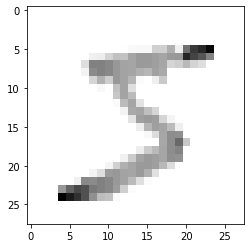

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [5]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
print(x_train[0])



In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam',  # 학습 알고리즘 선택
             loss='sparse_categorical_crossentropy', # loss 최소화 함수
             metrics=['accuracy'])  # 정확도 저장
model.fit(x_train, y_train, epochs=3)  # 모델 학습


Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/3
60000/60000 [==============================] - 8s 126us/sample - loss: 0.2706 - acc: 0.9209
Epoch 2/3
60000/60000 [==============================] - 8s 127us/sample - loss: 0.1092 - acc: 0.9663
Epoch 3/3
60000/60000 [==============================] - 7s 122us/sample - loss: 0.0739 - acc: 0.9768


In [7]:
val_loss, val_acc = model.evaluate(x_test, y_test)  # 테스트 데이터로 loss 및 accurary 확인

10000/10000 [==============================] - 1s 63us/sample - loss: 0.1032 - acc: 0.9676


In [8]:
print(val_loss)
print(val_acc)

0.10319959144983441
0.9676


In [10]:
model.save('my_mnist.model')
new_model = tf.keras.models.load_model('my_mnist.model')
predictions = new_model.predict(x_test)
print(predictions)

[[9.35948741e-09 1.67419534e-09 7.90330716e-07 ... 9.99994516e-01
  1.09734337e-07 2.32152252e-06]
 [1.70004668e-07 4.03009995e-04 9.99592483e-01 ... 6.91020907e-10
  2.90681896e-07 4.40528473e-13]
 [8.33185965e-08 9.99891520e-01 1.31798315e-05 ... 2.47205771e-05
  2.21562332e-05 1.83361590e-06]
 ...
 [1.00957944e-08 4.46307808e-07 1.18377706e-07 ... 7.77299374e-06
  2.10992357e-06 6.27371774e-05]
 [2.78322189e-03 8.86706118e-07 3.40719930e-06 ... 1.25024144e-06
  7.20669851e-02 2.02559886e-06]
 [4.34758795e-06 9.83521886e-09 4.60003520e-07 ... 2.86005889e-11
  7.83858354e-07 2.64089017e-09]]


In [11]:
import numpy as np
print(np.argmax(predictions[0]))

7


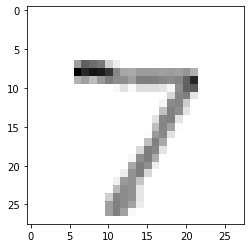

In [12]:
plt.imshow(x_test[0], cmap = plt.cm.binary)
plt.show()